In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('data.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


### Convert number of 'Classification' to [0,1]

In [75]:
df['Classification'].value_counts()
df['Classification'] = df['Classification'] - 1
df['Classification'].value_counts()

Classification
1    64
0    52
Name: count, dtype: int64

### Create data to train model

In [76]:
X = df.drop(columns=['Classification'])
y = df['Classification'].values.reshape(-1,1)

In [77]:
print(X.shape)
print(y.shape)

(116, 9)
(116, 1)


### Split data

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1)

### Built tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [81]:
my_tree = DecisionTreeClassifier(max_depth=2)
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### Prediction on test set

In [82]:
y_pred = my_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8 1]
 [0 3]]


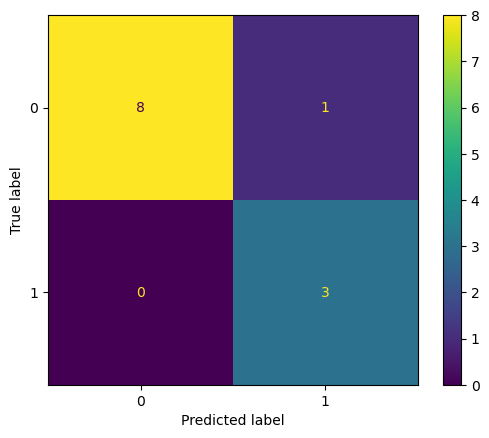

In [83]:
ConfusionMatrixDisplay.from_estimator(my_tree, X_test, y_test)

In [84]:
df = pd.read_csv('datareg.csv')
df.head()

,Product,Cost,Profit
0,'Asset Flip',100,1000
1,'Text Based',500,3000
2,'Visual Novel',1500,5000
3,'2D Pixel Art',3500,8000
4,'2D Vector Art',5000,6500


In [85]:
X = df['Cost'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [86]:
from sklearn.tree import DecisionTreeRegressor

my_tree_reg = DecisionTreeRegressor()
my_tree_reg.fit(X,y)

DecisionTreeRegressor()

In [87]:
X_test = [[4500]]
y_pred = my_tree_reg.predict(X_test)
print(y_pred)

[6500.]


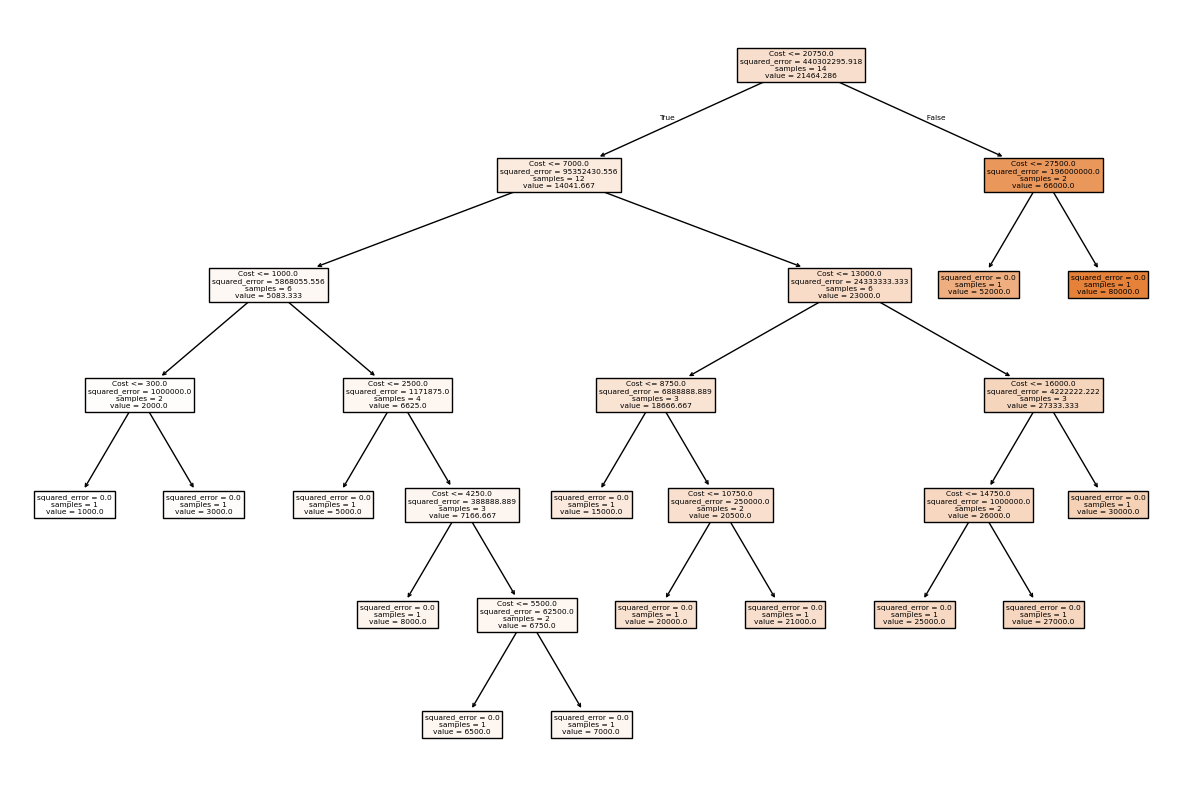

In [89]:
from sklearn import tree

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(my_tree_reg, feature_names=['Cost'], class_names=['Profit'], filled=True)